In [20]:
# Import libraries
import requests
import os
import numpy as np
import pandas as pd

%matplotlib inline

In [21]:
# Read in Adj Close prices from csv
stock_df = pd.read_csv("Resources/stock_historical_prices.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)['Adj Close']
stock_df = stock_df.sort_index()
stock_df.tail()

Date
2021-03-15    707.940002
2021-03-16    676.880005
2021-03-17    701.809998
2021-03-18    653.159973
2021-03-19    654.869995
Name: Adj Close, dtype: float64

In [22]:
# Calculate stock returns
returns = stock_df.pct_change()
returns.dropna(inplace=True)
returns.head()

Date
2018-03-20   -0.009599
2018-03-21    0.019256
2018-03-22   -0.023473
2018-03-23   -0.024458
2018-03-26    0.008755
Name: Adj Close, dtype: float64

<AxesSubplot:ylabel='Frequency'>

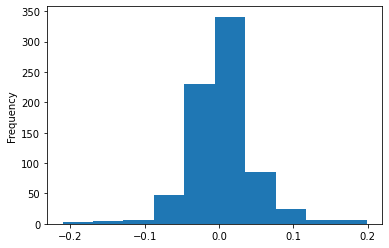

In [23]:
# Plot frequency distribution of returns
returns.plot(kind="hist")

In [24]:
# Calculate mean and standard dev of returns
mean = returns.mean()
std = returns.std()
(mean, std)

(0.004084559241466523, 0.044342739787770785)

In [25]:
from random import gauss
# Calculate the specific normal distribution of analyzed stock based on its average returns and standard deviation
gauss(mean, std)

-0.0008769970339911736

In [26]:
# Read in last stock price
last_val = stock_df.iloc[-1]
last_val

654.8699951171875

In [27]:
# Simulate the next stock value based on probability distribution
last_val * (1+gauss(mean,std))

647.3994825659271

In [28]:
# Simulate stock values for the next 15 days
simvals = [last_val]
days=15

for day in range(days):
    newval = simvals[-1] * (1+gauss(mean,std))
    simvals.append(newval)

simvals

[654.8699951171875,
 681.470298256847,
 700.17584555789,
 719.0742321884275,
 721.882714721074,
 763.8659652811419,
 785.257577065816,
 827.0821041841256,
 864.1500649219074,
 847.7327977409133,
 829.6352349932035,
 814.7900963117427,
 773.1426149450657,
 753.1999045241598,
 694.138507463322,
 697.3279836222184]

In [29]:
# Function to simulate stock prices
def simulate_stocks(days,starting_val):
    simvals = [starting_val]
    
    for day in range(days):
        newval = simvals[-1] * (1+gauss(mean,std))
        simvals.append(newval)
        
    return simvals

In [30]:
# Simulate next 15 day stock prices based on the last price
simulate_stocks(15,last_val)

[654.8699951171875,
 677.3044707054132,
 704.080431011642,
 732.4141340037709,
 707.370794317678,
 721.0154664983958,
 736.8373473207239,
 710.7264384354523,
 741.4815541936455,
 760.1683001105965,
 707.5448975768007,
 665.050551533237,
 696.8396943241848,
 745.0327370079041,
 794.8631335375786,
 726.626786877426]

In [31]:
# Simulate stock prices based on 1000 different random scenarios
trials =1000
results = []
for trial in range(trials):
    results.append(simulate_stocks(15,last_val))

In [32]:
# Create dataframe of possible stock prices based on 1000 random scenarios
pd.DataFrame(results).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,654.869995,643.538992,635.189935,658.659506,707.168602,671.148685,653.877547,685.254746,622.098018,646.490882,590.417865,617.391243,633.486255,647.005425,690.942543,667.524311
1,654.869995,655.079936,658.839593,647.083609,642.191458,554.056937,538.804851,556.824295,532.959939,560.509935,548.479162,524.186333,541.031228,531.259636,526.287197,515.598807
2,654.869995,677.956316,704.360882,678.456607,646.577947,604.381811,637.804236,627.783145,580.817285,579.712982,608.408045,566.230959,557.960052,616.230461,659.925505,650.968822
3,654.869995,675.814589,726.632784,779.402096,778.169573,814.858761,815.254513,770.782875,764.580010,758.140536,807.724831,847.667535,802.458985,820.677016,821.822681,782.893142
4,654.869995,634.607640,619.382523,610.547847,600.279991,613.861009,638.794639,661.172135,662.728943,656.056497,667.688846,752.401181,726.405477,754.836067,774.894996,818.833839


In [33]:
# Possible outcomes based on the each of 1000 scenarios (transformed dataframe)
results_df = pd.DataFrame(results).T
results_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
11,617.391243,524.186333,566.230959,847.667535,752.401181,661.485583,675.417277,605.106911,550.026830,819.562800,...,805.500867,1022.256760,630.231373,476.777878,776.276557,647.864195,728.415297,745.476153,642.485082,803.099472
12,633.486255,541.031228,557.960052,802.458985,726.405477,674.894332,636.553896,605.707438,556.758851,817.831331,...,790.660059,1081.927864,637.152212,476.104647,818.927130,700.555202,744.169093,748.375564,601.003137,833.891666
13,647.005425,531.259636,616.230461,820.677016,754.836067,599.157515,695.250077,598.779088,577.773836,836.692449,...,796.387486,1098.105381,690.103515,474.131608,819.656681,686.029797,778.883347,791.082624,581.934647,839.103987
14,690.942543,526.287197,659.925505,821.822681,774.894996,592.815933,702.509564,565.579512,594.051713,825.186455,...,792.571102,1104.936708,721.547753,466.047531,807.942163,688.622358,800.828188,834.930257,603.705978,880.124426
15,667.524311,515.598807,650.968822,782.893142,818.833839,601.530441,696.819136,508.142292,632.799433,808.082822,...,833.575903,1121.595256,683.935730,450.443501,713.339194,690.272529,863.662643,795.284631,612.583436,855.843154


<AxesSubplot:>

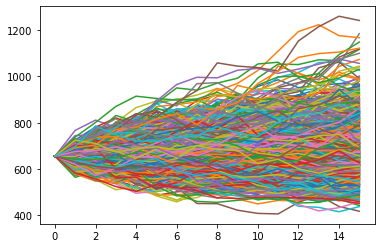

In [34]:
# Plot all possible stock price scenarios
results_df.plot(legend=False)

In [35]:
# Read in the end values (15th day) from the simulation
end_values = results_df.iloc[-1]
end_values.head()

0    667.524311
1    515.598807
2    650.968822
3    782.893142
4    818.833839
Name: 15, dtype: float64

<AxesSubplot:ylabel='Frequency'>

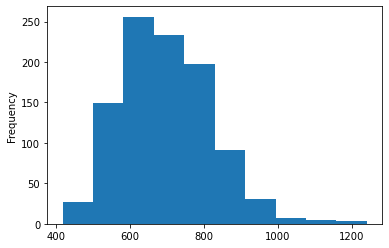

In [36]:
# Plot the probability distribution of end values from the simulation
end_values.plot(kind="hist")

In [37]:
# Calculate the range of possible prices 
end_values.quantile([0.1,0.9])

0.1    550.182884
0.9    851.675235
Name: 15, dtype: float64

In [38]:
# Read in last stock price
last_val

654.8699951171875